<a href="https://colab.research.google.com/github/AnitaKirkovska/Machine_Learning_Class/blob/master/HW2/My_Solutions/CIFAR10_K_fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the data**

In [0]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

**Preprocess the data**

In [0]:
from keras.utils import to_categorical

train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**The Architecture**

In [0]:
from keras import models
from keras import layers
import keras

opt = keras.optimizers.rmsprop(lr=0.0005, decay=1e-6)


def build_model():
  model = models.Sequential()
  
  model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D(2,2))

  model.add(layers.Conv2D(128, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D(2,2))

  model.add(layers.Conv2D(256, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D(2,2))

  model.add(layers.Flatten())

  model.add(layers.Dense(10, activation='softmax'))
  model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])

  return model

**K-fold validation**

In [8]:
import numpy as np 

k = 5

num_val_samples = len(train_images)//k
all_histories = []

for i in range(k):
  print('processing fold #', i)
  val_images = train_images[i* num_val_samples: (i+1) * num_val_samples]
  val_labels = train_labels[i* num_val_samples: (i+1) * num_val_samples]
  
  partial_train_images = np.concatenate(
    [train_images[:i * num_val_samples],
    train_images[(i+1)* num_val_samples:]],
    axis=0)
  
  partial_train_labels = np.concatenate(
    [train_labels[:i * num_val_samples],
    train_labels[(i+1)* num_val_samples:]],
    axis=0)
  
  model = build_model()
  history = model.fit(partial_train_images, 
            partial_train_labels, 
            validation_data = (val_images, val_labels),
            epochs=100,
            batch_size=128,
            verbose=0)
  k_history = history.history['val_acc']
  all_histories.append(k_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


**Successive mean K-fold validation scores**

In [0]:
average_history = [
    np.mean([x[i] for x in all_histories]) for i in range (100)
]

**Plotting validation scores**

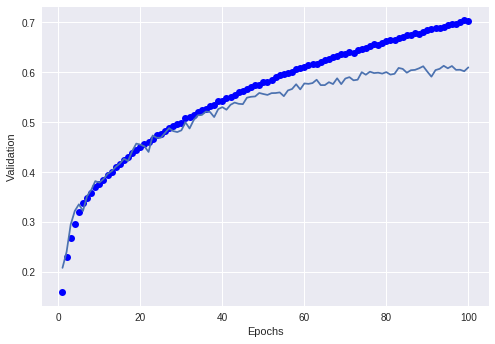

[[0.2205,
  0.2132,
  0.2904,
  0.3251,
  0.3422,
  0.3578,
  0.3347,
  0.3722,
  0.3817,
  0.3743,
  0.4136,
  0.4053,
  0.4151,
  0.4211,
  0.4116,
  0.4432,
  0.438,
  0.4422,
  0.4653,
  0.4525,
  0.4789,
  0.4269,
  0.4793,
  0.4887,
  0.4844,
  0.4492,
  0.487,
  0.5071,
  0.4881,
  0.4834,
  0.5153,
  0.5128,
  0.5146,
  0.5078,
  0.5134,
  0.5235,
  0.5276,
  0.508,
  0.535,
  0.552,
  0.5416,
  0.553,
  0.5559,
  0.5544,
  0.5645,
  0.5632,
  0.5589,
  0.5596,
  0.5668,
  0.5687,
  0.5684,
  0.5769,
  0.5663,
  0.57,
  0.5388,
  0.5693,
  0.5856,
  0.5768,
  0.5767,
  0.5989,
  0.5845,
  0.5803,
  0.5997,
  0.5778,
  0.5992,
  0.5719,
  0.5824,
  0.5755,
  0.6038,
  0.5964,
  0.592,
  0.5829,
  0.5829,
  0.6121,
  0.5987,
  0.5944,
  0.6062,
  0.5977,
  0.6167,
  0.6005,
  0.5961,
  0.6146,
  0.6169,
  0.5991,
  0.6062,
  0.5895,
  0.5977,
  0.6097,
  0.6168,
  0.5943,
  0.6,
  0.5787,
  0.604,
  0.6231,
  0.5895,
  0.6083,
  0.593,
  0.6046,
  0.5935,
  0.5943],
 [0.2157,
  0

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(range(1, len(average_history)+1),  average_history)
plt.xlabel("Epochs")
plt.ylabel("Validation")
plt.show()

all_histories